# Deep Learning



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("covertype.csv") #please enter the path where you covertype.csv file is stored.

x = df.loc[:, 'Elevation':]
x = x.loc[:, x.columns != 'Cover_Type']
  
y = df['Cover_Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 55)

### Train a simple deep neural network
- Use Keras to define a simple Multi-Layer Perceptron with at least 3 layers and a Softmax classifier
    - You have to explicitly give the input shape of the first layer
    - The other layer shapes are inferred
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Define 'accuracy' as performance metric when compiling the network model
- Train the MLP with x_train, y_train
    - Make sure to save the training history for later assessment
- Evaluate the performance on x_test, y_test

In [0]:
import keras as kr
import tensorflow as tf

number_of_classes = len(set(y))

model = kr.Sequential([
    kr.layers.Dense(54, input_dim=x_train.columns.size,activation=tf.nn.softmax),
    kr.layers.Dense(128, activation=tf.nn.softmax),
    kr.layers.Dense(number_of_classes, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
10584/10584 [==============================] - 2s 151us/step - loss: nan - acc: 4.7241e-04
Epoch 2/20
10584/10584 [==============================] - 1s 122us/step - loss: nan - acc: 0.0000e+00
Epoch 3/20
10584/10584 [==============================] - 1s 122us/step - loss: nan - acc: 0.0000e+00
Epoch 4/20
10584/10584 [==============================] - 1s 126us/step - loss: nan - acc: 0.0000e+00
Epoch 5/20
10584/10584 [==============================] - 1s 127us/step - loss: nan - acc: 0.0000e+00
Epoch 6/20
10584/10584 [==============================] - 1s 125us/step - loss: nan - acc: 0.0000e+00
Epoch 7/20
10584/10584 [==============================] - 1s 125us/step - loss: nan - acc: 0.0000e+00
Epoch 8/20
10584/10584 [==============================] - 1s 126us/step - loss: nan - acc: 0.0000e+00
Epoch 9/20
10584/10584 [==============================] - 1s 126us/step - loss: nan - acc: 0.0000e+00
Epoch 10/20
10584/10584 [==============================] - 1s 126us/step - loss: n

In [0]:

import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy %')
    plt.plot(hist.epoch, np.array(hist.history['acc']), label='Train Accuracy')
    plt.plot(hist.epoch, np.array(hist.history['val_acc']), label = 'Test Accuracy')
    plt.legend()
    plt.ylim([0, 1])
    

    

### Debug
- If your loss is NaN, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [0]:
import numpy as np

print('\n-----------------Are here any NaNs?--------------:\n')
display(df.isnull().values.any())

print('\n-----------------Are here any inf values?--------------:\n')
df.replace([np.inf, -np.inf], np.nan)
display(df.isnull().values.any())


print('\n-----------------Labels--------------:\n')
y = df["Cover_Type"]-1
labels = set(y)
labels



-----------------Are here any NaNs?--------------:



False


-----------------Are here any inf values?--------------:



False


-----------------Labels--------------:



{0, 1, 2, 3, 4, 5, 6}

### Train again
- Reinitialize or redefine your MLP from above and train it again

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 55)
number_of_classes = len(set(y))

model = kr.Sequential([
    kr.layers.Dense(54, input_shape = (54, ), activation = tf.nn.softmax),
    kr.layers.Dense(30, activation = tf.nn.softmax),
    kr.layers.Dense(number_of_classes, activation = tf.nn.softmax)
])

model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history1 = model.fit(x_train, y_train, epochs = 54, batch_size = 196, validation_data = (x_test, y_test))



Train on 10584 samples, validate on 4536 samples
Epoch 1/54
10584/10584 [==============================] - 1s 51us/step - loss: 1.9464 - acc: 0.1439 - val_loss: 1.9442 - val_acc: 0.1404
Epoch 2/54
10584/10584 [==============================] - 0s 25us/step - loss: 1.9423 - acc: 0.1440 - val_loss: 1.9404 - val_acc: 0.1404
Epoch 3/54
10584/10584 [==============================] - 0s 26us/step - loss: 1.9377 - acc: 0.1808 - val_loss: 1.9360 - val_acc: 0.2216
Epoch 4/54
10584/10584 [==============================] - 0s 26us/step - loss: 1.9309 - acc: 0.2511 - val_loss: 1.9266 - val_acc: 0.2582
Epoch 5/54
10584/10584 [==============================] - 0s 24us/step - loss: 1.9200 - acc: 0.2543 - val_loss: 1.9137 - val_acc: 0.2776
Epoch 6/54
10584/10584 [==============================] - 0s 25us/step - loss: 1.9024 - acc: 0.2792 - val_loss: 1.8923 - val_acc: 0.2826
Epoch 7/54
10584/10584 [==============================] - 0s 26us/step - loss: 1.8723 - acc: 0.2935 - val_loss: 1.8620 - val_acc:

4536/4536 [==============================] - 0s 66us/step
Test accuracy: 0.28769841275097413
Test loss: 1.4428468705064617


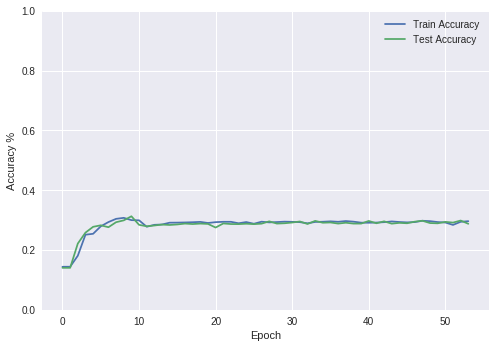

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

plot_hist(history1)

### Does it work?
- The loss should now be a number.
- Does the network converge?



### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [0]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format


stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])

for col in x.columns:
    stats.loc[col] = {"Type": x[col].dtype,
                      "Min": x[col].min(),
                      "Max": x[col].max(),
                      "Mean": x[col].mean(),
                      "Std": x[col].std()
                     }



display(stats)

,Type,Min,Max,Mean,Std
Elevation,int64,1863,3849,2749.32,417.68
Aspect,int64,0,360,156.68,110.09
Slope,int64,0,52,16.50,8.45
Horizontal_Distance_To_Hydrology,int64,0,1343,227.20,210.08
Vertical_Distance_To_Hydrology,int64,-146,554,51.08,61.24
Horizontal_Distance_To_Roadways,int64,0,6890,1714.02,1325.07
Hillshade_9am,int64,0,254,212.70,30.56
Hillshade_Noon,int64,99,254,218.97,22.80
Hillshade_3pm,int64,0,248,135.09,45.90
Horizontal_Distance_To_Fire_Points,int64,0,6993,1511.15,1099.94


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [0]:
from sklearn.preprocessing import StandardScaler as sc
df_new = df
df_to_norm = df_new[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways','Hillshade_9am',
   'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]

scaler = sc().fit(df_to_norm.values)
scaled_array = scaler.transform(df_to_norm.values)

scaled_df = pd.DataFrame(scaled_array, index=df_to_norm.index, columns=df_to_norm.columns)
df_new.update(scaled_df)
df_new.head(5)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,-0.37,-0.96,-1.60,0.15,-0.83,-0.91,0.27,0.57,0.28,...,0,0,0,0,0,0,0,0,0,5
1,2,-0.38,-0.91,-1.72,-0.07,-0.93,-1.00,0.24,0.70,0.35,...,0,0,0,0,0,0,0,0,0,5
2,3,0.13,-0.16,-0.89,0.19,0.23,1.11,0.70,0.83,-0.00,...,0,0,0,0,0,0,0,0,0,2
3,4,0.09,-0.02,0.18,0.07,1.09,1.04,0.83,0.83,-0.29,...,0,0,0,0,0,0,0,0,0,2
4,5,-0.37,-1.01,-1.72,-0.35,-0.85,-1.00,0.24,0.66,0.32,...,0,0,0,0,0,0,0,0,0,5


In [0]:
x_new = df_new.drop(['Cover_Type', 'Id'], axis=1).values

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=55)

### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [0]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format


stats = pd.DataFrame(columns=["Type", "Min", "Max", "Mean", "Std"])


for col in df_to_norm.columns.values:
    stats.loc[col] = {"Type": df_new[col].dtype,
                      "Min": df_new[col].min(),
                      "Max": df_new[col].max(),
                      "Mean": df_new[col].mean(),
                      "Std": df_new[col].std()
                     }



display(stats)

,Type,Min,Max,Mean,Std
Elevation,float64,-2.12,2.63,0.00,1.00
Aspect,float64,-1.42,1.85,0.00,1.00
Slope,float64,-1.95,4.20,-0.00,1.00
Horizontal_Distance_To_Hydrology,float64,-1.08,5.31,0.00,1.00
Vertical_Distance_To_Hydrology,float64,-3.22,8.21,-0.00,1.00
Horizontal_Distance_To_Roadways,float64,-1.29,3.91,0.00,1.00
Hillshade_9am,float64,-6.96,1.35,-0.00,1.00
Hillshade_Noon,float64,-5.26,1.54,0.00,1.00
Hillshade_3pm,float64,-2.94,2.46,0.00,1.00
Horizontal_Distance_To_Fire_Points,float64,-1.37,4.98,0.00,1.00


### Train the network again
- Reinitialize or redefine your MLP from above and train it again


In [0]:
model = kr.Sequential([
    kr.layers.Dense(112, input_shape = (54, ), activation = tf.nn.relu),
    kr.layers.Dropout(0.4),
    kr.layers.Dense(56, activation = tf.nn.relu),
    kr.layers.Dropout(0.4),
    kr.layers.Dense(28, activation = tf.nn.relu),
    kr.layers.Dropout(0.4),
    kr.layers.Dense(number_of_classes, activation = tf.nn.softmax)
])

model.compile(optimizer = tf.train.AdamOptimizer(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history4 = model.fit(x_train, y_train, epochs = 196, batch_size = 54, validation_data = (x_test, y_test))


Train on 10584 samples, validate on 4536 samples
Epoch 1/196
10584/10584 [==============================] - 2s 152us/step - loss: 1.6253 - acc: 0.3221 - val_loss: 1.0778 - val_acc: 0.5895
Epoch 2/196
10584/10584 [==============================] - 1s 104us/step - loss: 1.1670 - acc: 0.5047 - val_loss: 0.8557 - val_acc: 0.6609
Epoch 3/196
10584/10584 [==============================] - 1s 103us/step - loss: 1.0099 - acc: 0.5682 - val_loss: 0.7898 - val_acc: 0.6726
Epoch 4/196
10584/10584 [==============================] - 1s 101us/step - loss: 0.9543 - acc: 0.5942 - val_loss: 0.7595 - val_acc: 0.6817
Epoch 5/196
10584/10584 [==============================] - 1s 100us/step - loss: 0.9014 - acc: 0.6225 - val_loss: 0.7293 - val_acc: 0.6975
Epoch 6/196
10584/10584 [==============================] - 1s 100us/step - loss: 0.8692 - acc: 0.6370 - val_loss: 0.7183 - val_acc: 0.6931
Epoch 7/196
10584/10584 [==============================] - 1s 102us/step - loss: 0.8362 - acc: 0.6593 - val_loss: 0.6

### Visualize the training
- use matplotlib.pyplot to visualize the keras history
- plot both the training accuracy and the validation accuracy

4536/4536 [==============================] - 0s 68us/step
Test accuracy: 0.8234126985178213
Test loss: 0.45651696619743604


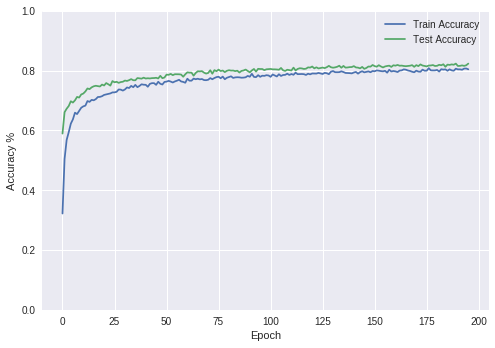

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

plot_hist(history4)
